In [258]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import category_encoders as ce

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [259]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [260]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [261]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [262]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [263]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [264]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [265]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [266]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [267]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [268]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [270]:
data.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                             1473
lng                                             1473
sample                                             2
reviewer_score                                    38
dtype: int64

### Создание новых признаков из даты.

In [271]:
data['review_date'] = pd.to_datetime(data['review_date'])
data['review_days'] = data['review_date'].dt.day_name()

data = pd.get_dummies(data, columns=['review_days'], dtype = 'int')

data['review_year'] = data['review_date'].dt.year
data['review_quarter'] = data['review_date'].dt.quarter

data = pd.get_dummies(data, columns = ['review_quarter', 'review_year'], dtype = 'int')

In [272]:
data['review_num_days'] = data['review_date'].dt.day
bin_encoder = ce.BinaryEncoder(cols='review_num_days')
data= bin_encoder.fit_transform(data)


### Создание новых признаков из тэгов.

In [273]:
data['type_trip'] = data['tags'].apply(lambda x: x.split(',')[0])
data['type_trip'] = data['type_trip'].apply(lambda x: x.replace("'", "").replace('[','').replace(']', '').strip())
data['type_trip'].value_counts()

Leisure trip                  416672
Business trip                  82748
Couple                          5808
Solo traveler                   4291
Family with young children      2227
Group                           1600
With a pet                      1405
Family with older children       931
Travelers with friends            56
Name: type_trip, dtype: int64

In [274]:
bin_encoder = ce.BinaryEncoder(cols='type_trip')
data= bin_encoder.fit_transform(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 41 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [275]:
def replace_tags_two(value):
    value = value.strip().split(',')
    if len(value)> 1:
        return str(value[1]).replace(' ', '').replace("'","").lower()
    else:
        return 0
    

    
data['type_second'] = data['tags'].apply(replace_tags_two)

data['type_second'].value_counts().head(10)
top_values = data['type_second'].value_counts().nlargest(5).index
data['type_second_2'] = data['type_second'].apply(lambda x: x if x in top_values else 'other')

data['type_second_2'].value_counts()

couple                     245754
solotraveler               104060
group                       63649
familywithyoungchildren     58573
familywitholderchildren     25326
other                       18376
Name: type_second_2, dtype: int64

In [276]:
data = pd.get_dummies(data, columns = ['type_second_2'], dtype = 'int')

In [277]:
data.drop('type_second', axis = 1, inplace = True)

### Перекодирование признака 'negative_review'.

In [278]:
!pip install nltk

In [279]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer



In [280]:
sia = SentimentIntensityAnalyzer()

def sent_neg(value):
    for x in value:
        sentiment = sia.polarity_scores(x)
        return sentiment

data['negative_review'] = data['negative_review'].apply(sent_neg)



In [281]:
data['neg_n'] = data['negative_review'].apply(lambda x: x['neg'])
data['neu_n'] = data['negative_review'].apply(lambda x: x['neu'])
data['pos_n'] = data['negative_review'].apply(lambda x: x['pos'])
data['compound_n'] = data['negative_review'].apply(lambda x: x['compound'])


In [282]:
sia = SentimentIntensityAnalyzer()

def sent_pos(value):
    for x in value:
        sentiment = sia.polarity_scores(x)
        return sentiment

data['positive_review'] = data['positive_review'].apply(sent_pos)

data['neg_p'] = data['positive_review'].apply(lambda x: x['neg'])
data['neu_p'] = data['positive_review'].apply(lambda x: x['neu'])
data['pos_p'] = data['positive_review'].apply(lambda x: x['pos'])
data['compound_p'] = data['positive_review'].apply(lambda x: x['compound'])


In [283]:
bin_encoder = ce.BinaryEncoder(cols='reviewer_nationality')
data= bin_encoder.fit_transform(data)


### Получение признаков 'city' и 'country'.

In [284]:
data['country'] = data['hotel_address'].apply(lambda x: str(x.split(' ')[-1]).replace("'", ''))
data['country'].value_counts()

Kingdom        262301
Spain           60149
France          59928
Netherlands     57214
Austria         38939
Italy           37207
Name: country, dtype: int64

In [285]:
def city_count(value):
    value = value.lower()
    value = value.split(' ')
    if value[-2] == 'united':
        return value[-5]
    else:
        return value[-2]
    
data['city'] = data['hotel_address'].apply(city_count)
data['city'].value_counts()

london       262301
barcelona     60149
paris         59928
amsterdam     57214
vienna        38939
milan         37207
Name: city, dtype: int64

### Применение One-Hot Encoding признаков 'city' и 'country'.

In [286]:
data = pd.get_dummies(data, columns=['city'], dtype = 'int')
data = pd.get_dummies(data, columns=['country'], dtype = 'int')

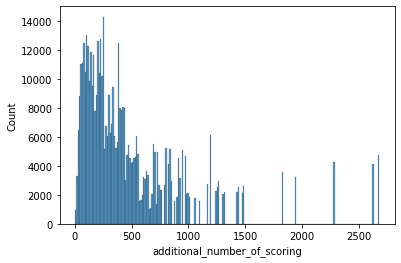

In [287]:
ax = sns.histplot(data['additional_number_of_scoring'])

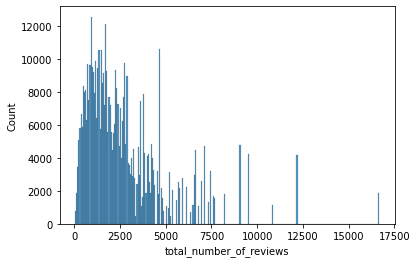

In [288]:
ax = sns.histplot(data['total_number_of_reviews'])

### Нормализация признаков.

In [289]:
from sklearn import preprocessing
r_scaller = preprocessing.RobustScaler()
data_r = r_scaller.fit_transform(data[['additional_number_of_scoring']])
data_r = pd.DataFrame(data_r)

data_r_2 = r_scaller.fit_transform(data[['total_number_of_reviews']])
data_r_2 = pd.DataFrame(data_r_2)


In [290]:
data['additional_number_of_scoring'] = data_r
data['additional_number_of_scoring']

0         1.146640
1         0.551935
2        -0.600815
3        -0.203666
4         1.004073
            ...   
515733   -0.476578
515734   -0.140530
515735    0.236253
515736    0.048880
515737   -0.242363
Name: additional_number_of_scoring, Length: 515738, dtype: float64

In [291]:
data['total_number_of_reviews'] = data_r_2
data['total_number_of_reviews']

0         5.928222
1         1.176183
2        -0.727162
3        -0.241028
4         1.041191
            ...   
515733   -0.618679
515734    0.444535
515735    0.251631
515736   -0.231240
515737   -0.377243
Name: total_number_of_reviews, Length: 515738, dtype: float64

In [292]:
data_r_3 = r_scaller.fit_transform(data[['review_total_negative_word_counts']])
data_r_3 = pd.DataFrame(data_r_3)

In [293]:
data['review_total_negative_word_counts'] = data_r_3

In [294]:
data_r_4 = r_scaller.fit_transform(data[['review_total_positive_word_counts']])
data_r_4 = pd.DataFrame(data_r_4)

In [295]:
data['review_total_positive_word_counts'] = data_r_4

In [296]:
data.drop(['lat', 'lng', 'review_date','type_trip_3'], axis = 1, inplace=True)

### Построение тепловой карты корреляции.

<AxesSubplot:>

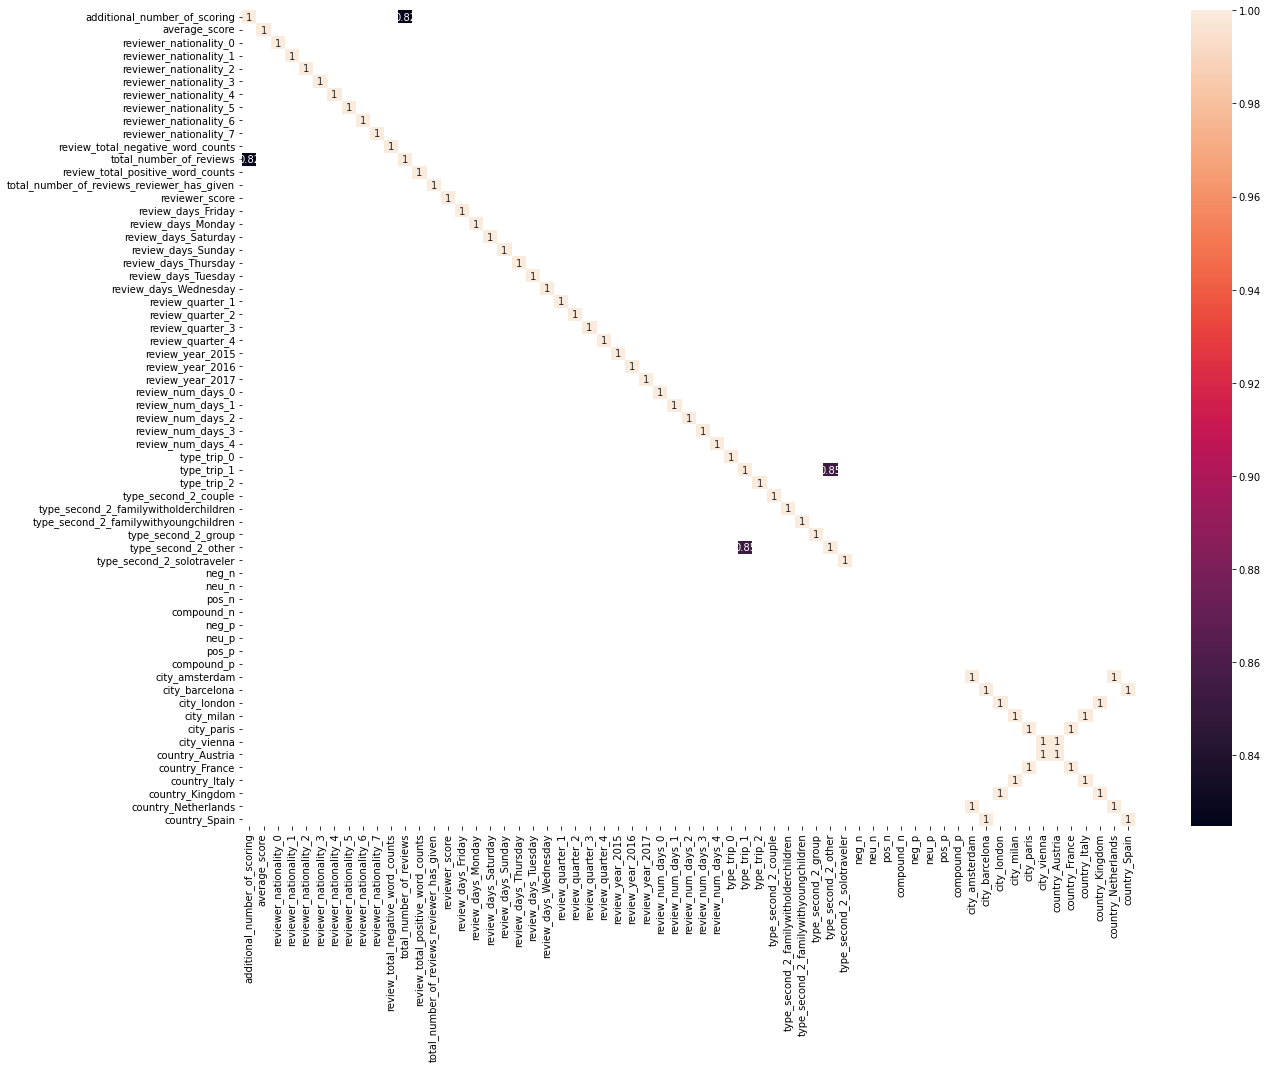

In [297]:
corr = data.drop(['sample'], axis=1).corr().mask(data.drop(['sample'], axis=1).corr() < 0.7)

# строим heatmap только для значений выше 0.8
plt.rcParams['figure.figsize'] = (20,15)
sns.heatmap(corr, annot=True)

In [298]:
#plt.rcParams['figure.figsize'] = (20,15)
#sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

In [299]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

### Удаление признков с высокой корреляцией.

In [300]:
data.drop(['additional_number_of_scoring','type_second_2_other'], axis =1, inplace = True)

In [301]:
#data.drop('type_second_2_other', axis =1, inplace = True)

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 62 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               515738 non-null  float64
 1   reviewer_nationality_0                      515738 non-null  int64  
 2   reviewer_nationality_1                      515738 non-null  int64  
 3   reviewer_nationality_2                      515738 non-null  int64  
 4   reviewer_nationality_3                      515738 non-null  int64  
 5   reviewer_nationality_4                      515738 non-null  int64  
 6   reviewer_nationality_5                      515738 non-null  int64  
 7   reviewer_nationality_6                      515738 non-null  int64  
 8   reviewer_nationality_7                      515738 non-null  int64  
 9   review_total_negative_word_counts           515738 non-null  float64
 

In [303]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [304]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [305]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 61), (386803, 61), (386803, 60), (309442, 60), (77361, 60))

In [306]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [307]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [308]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished


In [309]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
def mape_func(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print('MAPE:',mape_func(y_test, y_pred))

MAPE: 13.557935070997676


<AxesSubplot:>

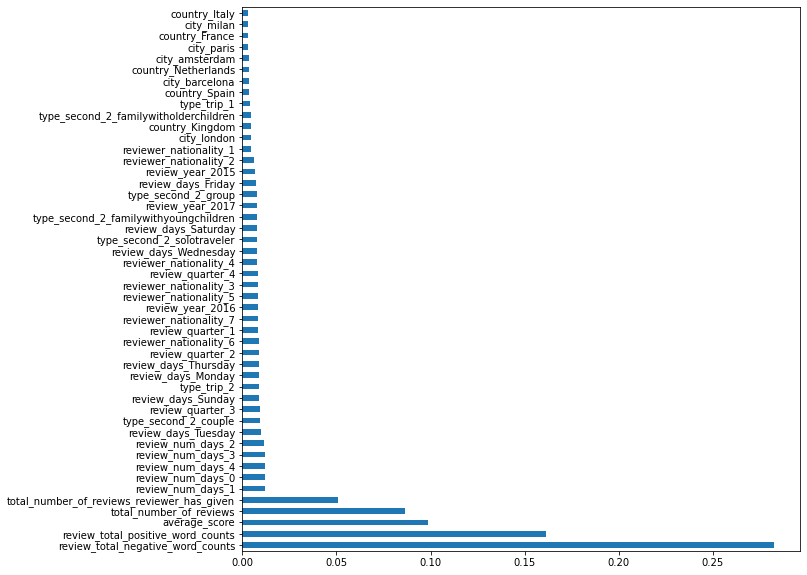

In [310]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(48).plot(kind='barh')

In [311]:
test_data.sample(10)

,average_score,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7,review_total_negative_word_counts,...,city_london,city_milan,city_paris,city_vienna,country_Austria,country_France,country_Italy,country_Kingdom,country_Netherlands,country_Spain
123483,7.8,0,0,0,0,0,0,1,1,-0.428571,...,1,0,0,0,0,0,0,1,0,0
90937,6.9,0,1,0,0,1,0,1,0,0.476190,...,1,0,0,0,0,0,0,1,0,0
82528,8.9,0,0,0,0,0,0,0,1,-0.238095,...,0,0,1,0,0,1,0,0,0,0
64955,8.6,0,0,0,0,0,1,0,0,-0.428571,...,0,0,1,0,0,1,0,0,0,0
91692,8.7,0,0,0,0,0,0,0,1,3.142857,...,1,0,0,0,0,0,0,1,0,0
44639,8.1,0,0,0,0,1,1,0,0,0.523810,...,1,0,0,0,0,0,0,1,0,0
39433,8.7,0,1,1,0,0,1,0,0,0.142857,...,0,0,1,0,0,1,0,0,0,0
97893,8.6,0,0,0,0,0,1,1,0,-0.428571,...,0,0,1,0,0,1,0,0,0,0
4403,8.2,0,0,0,0,0,0,0,1,-0.333333,...,1,0,0,0,0,0,0,1,0,0
117736,6.9,0,0,0,0,0,0,0,1,-0.428571,...,1,0,0,0,0,0,0,1,0,0


In [312]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [313]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [314]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.7s finished


In [315]:
predict_submission

array([8.189, 7.584, 8.234, ..., 8.035, 9.357, 7.319])

In [316]:
list(sample_submission)

['reviewer_score', 'id']

In [317]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.189,488440
1,7.584,274649
2,8.234,374688
3,9.590,404352
4,9.415,451596
5,8.732,302161
6,7.827,317079
7,7.819,13963
8,8.664,159785
9,7.835,195089
